# Guidelines

- There are three questions, each in separate jupyter notebook. 
- Add your roll number and name before the file name.
- Once you finish the assignment, export each notebook as HTML and upload to LMS.
- Write all your answers in jupyter notebook markdown cells.
- See end of the file for sample graphs.

# Keyterms
- PCA : Principle Component Analysis
- POV : Proportion of Variance
- SVD : Singluar Value Decomposition

# Question 1

Our ﬁrst problem is to perform PCA on the created dataset. The purpose is to help you
understand details of PCA. Please refer to chapter 6 (Dimension Reduction) of the lecture
notes. You need to ﬁnish the following tasks:

1. Write Your Own PCA.

Read lecture notes carefully, and implement your own PCA. You need to complete the
function pca(X) in the script below. The input is the matrix X in which each row
represents a sample. The output should be $[V, D]$, where V is a matrix containing all
eigenvectors (whose eigenvalues are in a decreasing order) and D should be a column vector
containing all eigenvalues (in a descent order). You can compare your result with the one
of PCA in the scikit-learn.

2. Plot Eigenvalues and POV.

We generate a dataset X, which is a 1000 × 9 matrix. Perform PCA on
this matrix and plot all eigenvalues in a decreasing order. Assume the descent ordered
eigenvalues are $λ1, λ2, · · ·, λN $. The x-axis should be $1, 2, · · ·, N$ (the order of eigenvalues)
and y-axis should be the eigenvalues (refer to sample image below).

In [1]:
# Do not change this cell
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Do not chane this block
def create_data(x1, x2, x3):
    x4 = -4.0 * x1
    x5 = 10 * x1 + 10
    x6 = -1 * x2 / 2
    x7 = np.multiply(x2, x2)
    x8 = -1 * x3 / 10
    x9 = 2.0 * x3 + 2.0
    X = np.hstack((x1, x2, x3, x4, x5, x6, x7, x8, x9))
    return X

# Complete the following code [25 marks]

In [3]:
# Implement your own PCA. You are only allowed to use numpy.
# Look at mean, cov, eig methods of the numpy for help.

def pca(X):
    '''
    # PCA step by step
    #   1. normalize matrix X
    #   2. compute the covariance matrix of the normalized matrix X
    #   3. do the eigenvalue decomposition on the covariance matrix
    # If you do not remember Eigenvalue Decomposition, please review the linear
    # algebra
    # In this assignment, we use the ``unbiased estimator'' of covariance. You
    # can refer to this website for more information
    # http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.cov.html
    # Actually, Singular Value Decomposition (SVD) is another way to do the
    # PCA, if you are interested, you can google SVD.
    # 
    '''

    ####################################################################
    # here V is the matrix containing all the eigenvectors, D is the
    # column vector containing all the corresponding eigenvalues.
    
    #YOUR CODE HERE!
    
    normalized_X = X - np.mean(X, axis=0)
    covariance = np.cov(normalized_X, rowvar=False)
    D, V = np.linalg.eig(covariance)
    
    return [V, D]

# Complete following code and answer the question. [25 marks]

**1. How many components (dimensions) do you think are enough to describe the data (observe the graphs).**

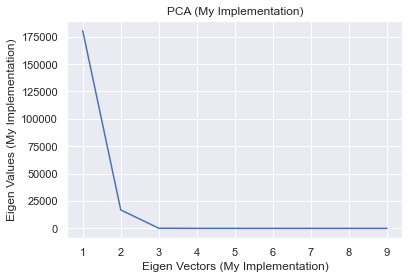

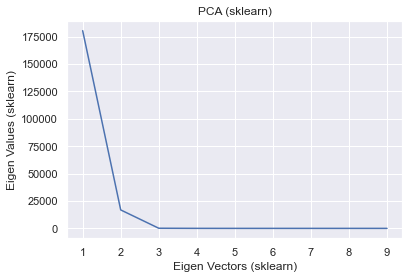

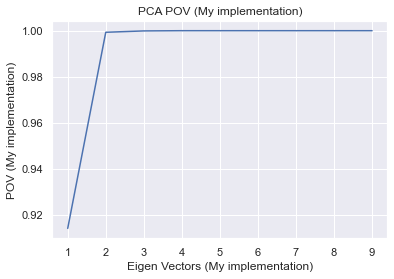

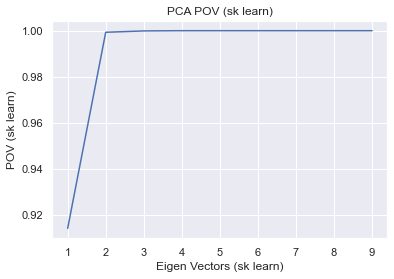

In [4]:
def main():
    N = 1000
    shape = (N, 1)
    x1 = np.random.normal(0, 1, shape) # samples from normal distribution
    x2 = np.random.exponential(10.0, shape) # samples from exponential distribution
    x3 = np.random.uniform(-100, 100, shape) # uniformly sampled data points
    X = create_data(x1, x2, x3) # creating synthetic data from all distributions above.
    
    ####################################################################
    #   1. perform PCA on matrix X using your PCA implementation as well as sklearn implementation.
    #   2. plot the eigenvalues against the order of eigenvalues (aka eigenvectors)
    #   3. plot POV (proportion of variance) v.s. the order of eigenvalues (aka eigenvectors). Compare this with sklearn
    #      output (by plotting).
    # YOUR CODE HERE!
    
    _, D = pca(X)    # My implementation
    sk_PCA = PCA()    # Library implementation
    sk_PCA.fit(X)

    eig_vals = sk_PCA.explained_variance_
    
    sum_eig_vals = sum(eig_vals)
    pov = eig_vals/sum_eig_vals
    
    plt.title("PCA (My Implementation)")
    plt.xlabel("Eigen Vectors (My Implementation)")
    plt.ylabel("Eigen Values (My Implementation)")
    plt.plot(np.array(range(1, 10)), D)
    plt.figure()
    
    plt.plot(np.array(range(1, 10)), eig_vals)
    plt.title("PCA (sklearn)")
    plt.xlabel("Eigen Vectors (sklearn)")
    plt.ylabel("Eigen Values (sklearn)")
    plt.figure()
    
    plt.title("PCA POV (My implementation)")
    plt.xlabel("Eigen Vectors (My implementation)")
    plt.ylabel("POV (My implementation)")
    plt.plot(np.array(range(1, 10)), np.cumsum(pov))
    plt.figure()
    
    plt.title("PCA POV (sk learn)")
    plt.xlabel("Eigen Vectors (sk learn)")
    plt.ylabel("POV (sk learn)")
    plt.plot(np.array(range(1, 10)), sk_PCA.explained_variance_ratio_.cumsum())

    ####################################################################


if __name__ == '__main__':
    main()

# Sample Graphs

### Note: This is just a sample, so do not try to make exact replica. Use your own imagination.

<img src="sample_imgs/Figure1.png" alt="Alt text that describes the graphic" title="Title text" />

<img src="sample_imgs/Figure2.png" alt="Alt text that describes the graphic" title="Title text" />

<img src="sample_imgs/Figure3.png" alt="Alt text that describes the graphic" title="Title text" />